In [2]:
import cv2

In [3]:
import dlib

In [4]:
import PIL.Image
import numpy as np

In [5]:
import PIL
import face_recognition_models

In [6]:
im = PIL.Image.open("Planehow.jpg")
im=im.rotate(-90)

In [7]:
im=im.convert("L")
a,b=im.size
a,b

(1512, 1134)

In [8]:
a1=a/5
b1=b/5
a1,b1

(302.4, 226.8)

In [23]:
im=im.resize((302,227))

In [9]:
cnn_face_detection_model = face_recognition_models.cnn_face_detector_model_location()
predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
predictor_5_point_model = face_recognition_models.pose_predictor_five_point_model_location()
face_recognition_model = face_recognition_models.face_recognition_model_location()#load sample from face_recognition_model

In [11]:
face_detector = dlib.get_frontal_face_detector()
pose_predictor_68_point = dlib.shape_predictor(predictor_68_point_model)
pose_predictor_5_point = dlib.shape_predictor(predictor_5_point_model)
cnn_face_detector = dlib.cnn_face_detection_model_v1(cnn_face_detection_model)
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

In [24]:
arrize_imag=np.array(im)

In [30]:
modrect=cnn_face_detector(arrize_imag,upsample_num_times=3)

In [97]:
modrect

In [48]:
Rtg = modrect[0].rect
Rtg1 = modrect[1].rect
Rtg

rectangle(83,-1,156,73)

In [84]:
def rect_to_css(rect):
    return rect.left(),rect.top(),rect.right(),rect.bottom()

def tup_transfer(tupp):
    litupp=list(tupp)
    position=0
    for i in litupp:
        litupp[position]=i*5
        position=position+1
    return litupp#scale the origin tupple and transfer it to list

def _css_to_rect(css):
    return dlib.rectangle(css[3], css[0], css[1], css[2])

In [57]:
a=rect_to_css(Rtg)
b=rect_to_css(Rtg1)

In [161]:
origin_img = PIL.Image.open("Planehow.jpg")
origin_img=origin_img.rotate(-90)

In [92]:
a1=tup_transfer(a)
b1=tup_transfer(b)
finished_list=np.append([a1],[b1],axis=0)
finished_list
finished_arrary=np.array(origin_img)

In [95]:
tr=[_css_to_rect(i) for i in finished_list]

In [134]:
face_image=finished_arrary
pose_predictor = pose_predictor_68_point
tr1=[pose_predictor(face_image, face_location) for face_location in tr]

In [135]:
parts = [[(p.x, p.y) for p in landmark.parts()] for landmark in tr1]

In [136]:
parts=np.array(part)
np.shape(parts)

(2, 68, 2)

In [146]:
pix=origin_img.load()

In [141]:
face_part=[{"chin": points[0:17],
            "left_eyebrow": points[17:22],
            "right_eyebrow": points[22:27],
            "nose_bridge": points[27:31],
            "nose_tip": points[31:36],
            "left_eye": points[36:42],
            "right_eye": points[42:48],
            "top_lip": points[48:55] + [points[64]] + [points[63]] + [points[62]] + [points[61]] + [points[60]],
            "bottom_lip": points[54:60] + [points[48]] + [points[60]] + [points[67]] + [points[66]] + [points[65]] + [points[64]]
        } for points in parts]

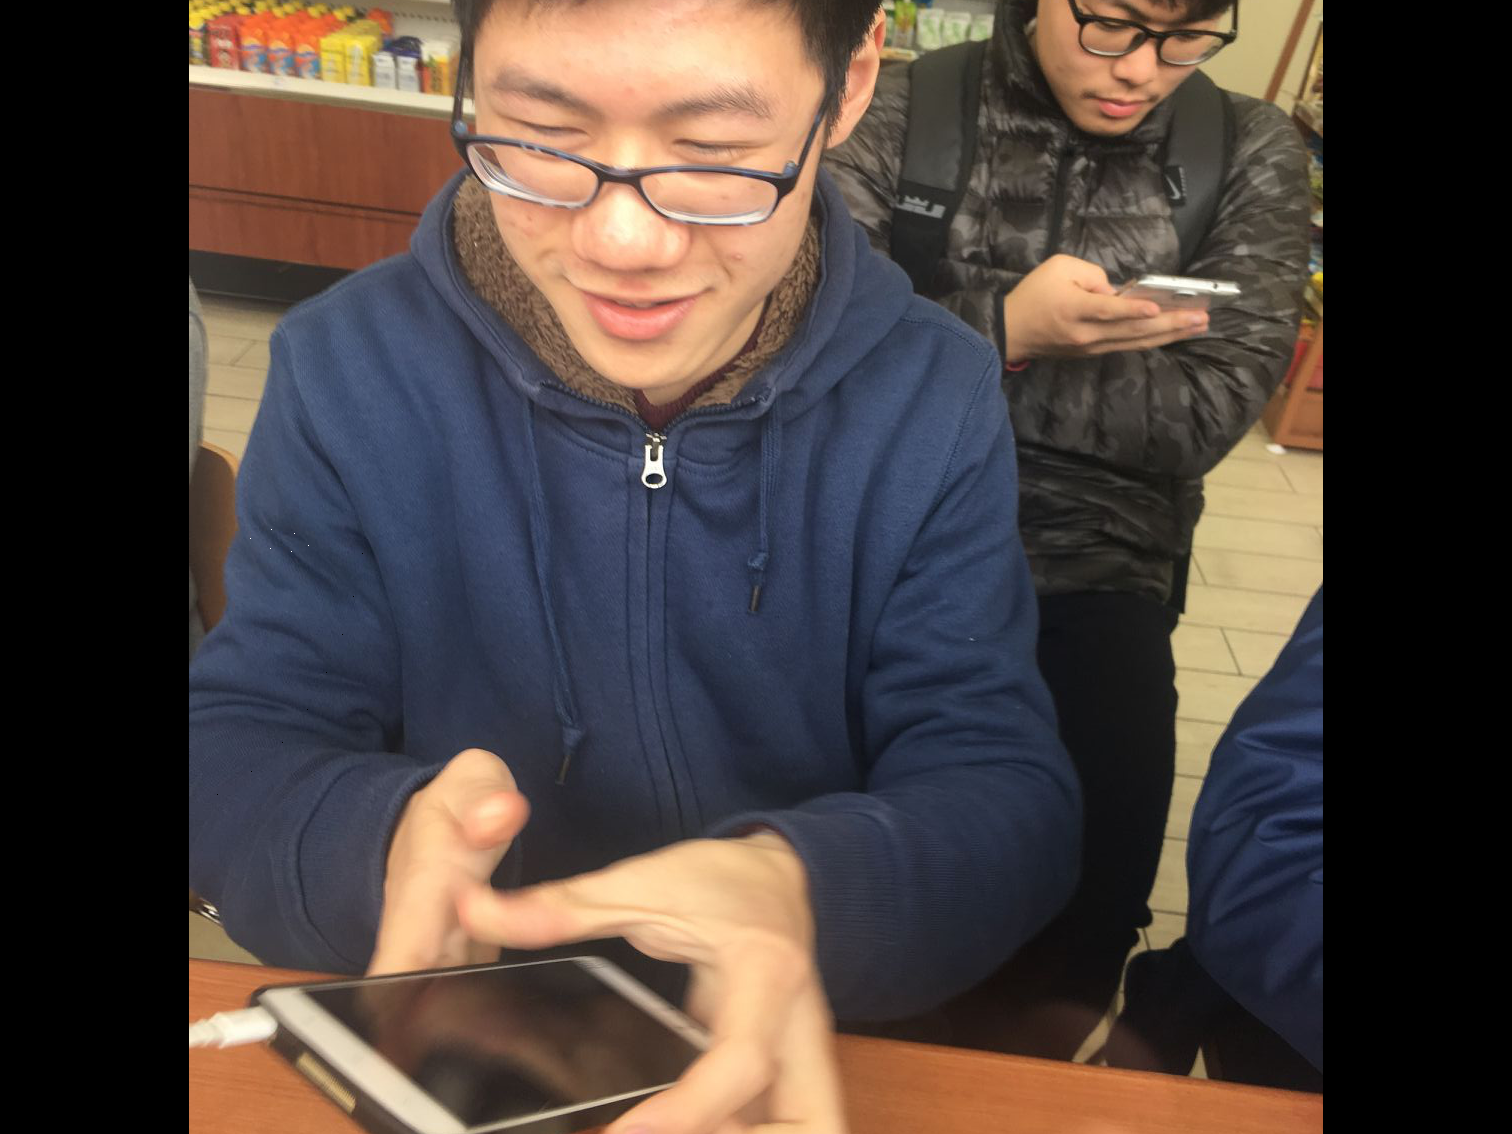

In [174]:
for i in face_part[0]["chin"]:
    origin_img.putpixel((i[0],i[1]),(0,0,0))
origin_img

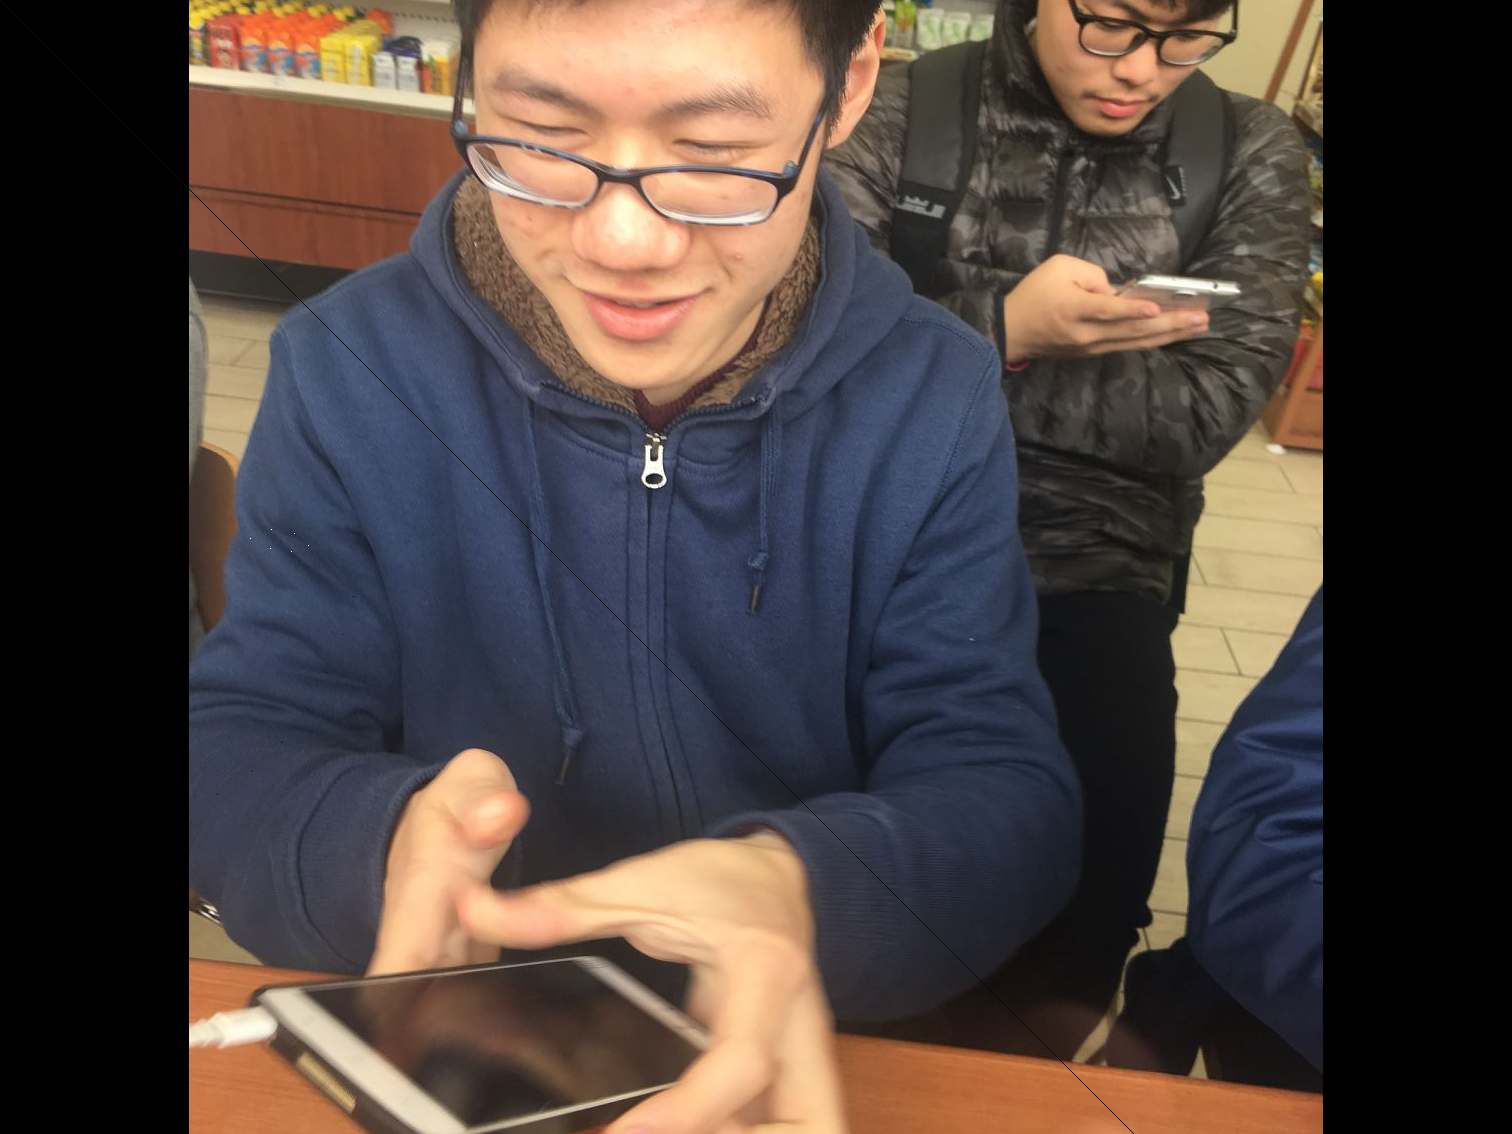

In [175]:
width, height = origin_img.size 
for x in range(height): 
    origin_img.putpixel( (x, x), (10, 10, 10, 255) ) 
origin_img